In [57]:
from main import *
from optimization import exhaustive_search, nelder_mead, gauss_method
import matplotlib.pyplot as plt

In [26]:
def generate_data():
    a, b = np.random.random(2)
    x_s = [i / 100 for i in range(100)]
    t_s = np.random.normal(size=100)
    y_s = [a * x + t + b for (x, t) in zip(x_s, t_s)]
    return list(zip(x_s, y_s))

In [27]:
def visualize_data(data, a, b, approx_func, name):
    x_line = [i / 100 for i in range(100)]
    y_line = [approx_func(i, a, b) for i in x_line]
    plt.scatter([v for (v, _) in data], [v for (_, v) in data])
    plt.plot(x_line, y_line, color="orange")
    plt.title(name)

In [28]:
gen_data = generate_data()

In [29]:
def visualize_gradient(data, approx_func_name):
    d, grad_a, grad_b = d_grad_a_b(data, globals()[f"{approx_func_name}_func"], 
                                   globals()[f"{approx_func_name}_grad_a_func"],
                                   globals()[f"{approx_func_name}_grad_b_func"]
                                    )
    step_num, y, points = fast_gradient_descent(d, 1, 1, grad_a, grad_b)
    visualize_data(data, points[-1][0], points[-1][1], 
                   globals()[f"{approx_func_name}_func"], "Fast gradient, approx {0}".format(approx_func_name))
    return step_num, y

(3, 85.95228777051479)

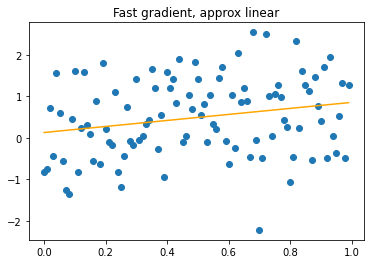

In [30]:
visualize_gradient(gen_data, "linear")

(15, 87.553928182933)

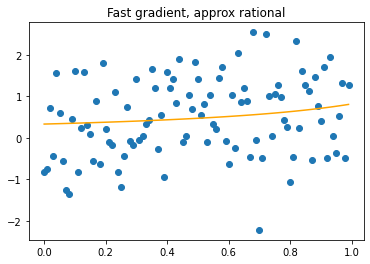

In [31]:
visualize_gradient(gen_data, "rational")

In [32]:
def visualize_conjugate_gradient(data, approx_func_name):
    d, grad_a, grad_b = d_grad_a_b(data, globals()[f"{approx_func_name}_func"], 
                                   globals()[f"{approx_func_name}_grad_a_func"],
                                   globals()[f"{approx_func_name}_grad_b_func"]
                                    )
    a, b = conjugate_gradient_descent(d, 1, 1, grad_a, grad_b)
    visualize_data(data, a, b, 
                  globals()[f"{approx_func_name}_func"], "Conjugate gradient, approx {0}".format(approx_func_name))

Optimization terminated successfully.
         Current function value: 85.952287
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5


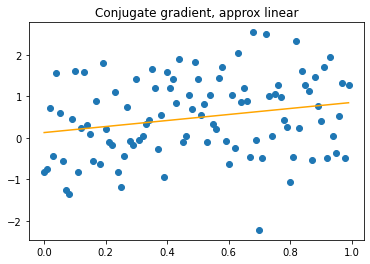

In [33]:
visualize_conjugate_gradient(gen_data, "linear")

Optimization terminated successfully.
         Current function value: 87.552543
         Iterations: 7
         Function evaluations: 22
         Gradient evaluations: 22


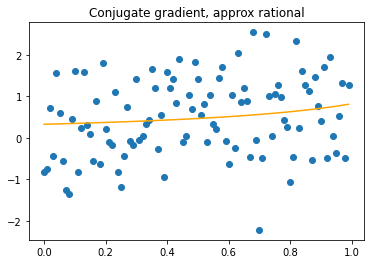

In [34]:
visualize_conjugate_gradient(gen_data, "rational")

In [42]:
def visualize_levenberg(data, approx_func_name):
    res = levenberg(data, globals()[f"{approx_func_name}_func"])
    print(res.cost)
    print(res.x[0], res.x[1])
    visualize_data(data, res.x[0], res.x[1], 
                  globals()[f"{approx_func_name}_func"], "Levenberg-Marquard method, approx {0}".format(approx_func_name))

96.92455638960666
0.5081594400550298 0.1932015340678139


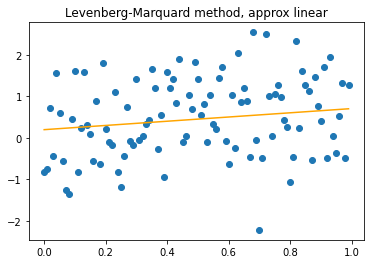

In [43]:
visualize_levenberg(gen_data, "linear")

98.22510988761343
0.30155036970198007 -0.5867929508683706


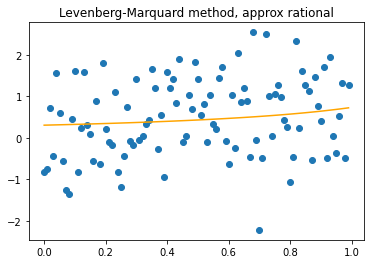

In [44]:
visualize_levenberg(gen_data, "rational")

In [38]:
def visualize_rational_newton(data, approx_func_name):
    a, b = newton_method(data, rational_func, rational_grad_a_func, rational_grad_a_a_func, rational_grad_a_b_func, 
                                     rational_grad_b_func, rational_grad_b_a_func, rational_grad_b_b_func)
    visualize_data(data, a, b, 
                  globals()[f"{approx_func_name}_func"], "Newton method, approx {0}".format(approx_func_name))

     fun: 91.48604679997938
     jac: array([-0.00057323,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 7
    nhev: 6
     nit: 6
    njev: 7
  status: 0
 success: True
       x: array([0.51523865, 0.2       ])


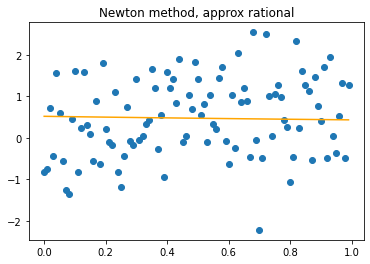

In [39]:
visualize_rational_newton(gen_data, "rational")

In [40]:
def zero(x, a, b):
    return 0

def visualize_linear_newton(data, approx_func_name):
    a, b = newton_method(data, linear_func, linear_grad_a_func, zero, zero, 
                                     linear_grad_b_func, zero, zero)
    visualize_data(data, a, b, 
                  globals()[f"{approx_func_name}_func"], "Newton method, approx {0}".format(approx_func_name))

     fun: 86.09997868362576
     jac: array([-2.33146835e-15,  0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 2
    nhev: 2
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0.61046326, 0.2       ])


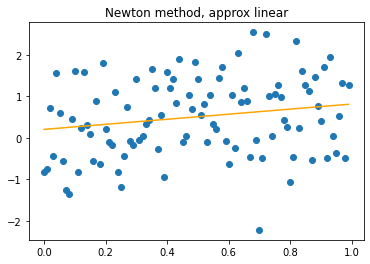

In [41]:
visualize_linear_newton(gen_data, "linear")

In [52]:
f_a_b_lin = lambda a, b: sum([(linear_func(x_p, a, b) - y_p) ** 2 for (x_p, y_p) in gen_data])
f_a_b_rat = lambda a, b: sum([(rational_func(x_p, a, b) - y_p) ** 2 for (x_p, y_p) in gen_data])

In [59]:
nelder_mead(f_a_b_lin)

 final_simplex: (array([[0.72550198, 0.12369053],
       [0.7254096 , 0.12375402],
       [0.72555169, 0.1236775 ]]), array([85.95228734, 85.95228738, 85.95228739]))
           fun: 85.95228734426013
       message: 'Optimization terminated successfully.'
          nfev: 120
           nit: 63
        status: 0
       success: True
             x: array([0.72550198, 0.12369053])


([], array([0.72550198, 0.12369053]), 0)

In [58]:
nelder_mead(f_a_b_rat)

 final_simplex: (array([[ 0.32288899, -0.60472316],
       [ 0.32288101, -0.60479532],
       [ 0.32295192, -0.60464364]]), array([87.55254312, 87.55254334, 87.55254335]))
           fun: 87.55254311910483
       message: 'Optimization terminated successfully.'
          nfev: 118
           nit: 61
        status: 0
       success: True
             x: array([ 0.32288899, -0.60472316])


([], array([ 0.32288899, -0.60472316]), 0)

In [60]:
exhaustive_search(gen_data, 0, 1, 0, 1, linear_func)

((85.95273026097715, 0.7181818181818181, 0.12727272727272726), 110)

In [61]:
exhaustive_search(gen_data, 0, 1, 0, 1, rational_func)

((90.33784884259052, 0.4818181818181818, 0.0), 110)

In [62]:
gauss_method(100, 1, 1, f_a_b_lin)

([(1, 1),
  (1, -0.012180272619209915),
  (0.9303330121695731, -0.012180272619209915),
  (0.9303330121695731, 0.022304845583154237),
  (0.8783454023325932, 0.022304845583154237),
  (0.8783454023325932, 0.048038730049987835),
  (0.8395505729027356, 0.048038730049987835),
  (0.8395505729027356, 0.06724217311765099),
  (0.8106006655805486, 0.06724217311765099),
  (0.8106006655805486, 0.08157237311857019),
  (0.7889973956698724, 0.08157237311857019),
  (0.7889973956698724, 0.09226597860357683),
  (0.7728763394390035, 0.09226597860357683),
  (0.7728763394390035, 0.10024591631578506),
  (0.7608462837704365, 0.10024591631578506),
  (0.7608462837704365, 0.10620076367193919),
  (0.7518691357182132, 0.10620076367193919),
  (0.7518691357182132, 0.11064446951088137),
  (0.7451700462416306, 0.11064446951088137),
  (0.7451700462416306, 0.11396051754004899),
  (0.740171015374357, 0.11396051754004899)],
 [-1,
  -0.012180272619209915,
  0.9303330121695731,
  0.022304845583154237,
  0.8783454023325932,


In [63]:
gauss_method(100, 1, 1, f_a_b_rat)

([(1, 1),
  (1, 1.6530567264669505),
  (0.6447380553274604, 1.6530567264669505),
  (0.6447380553274604, 0.11307864000447407),
  (0.5019105083047197, 0.11307864000447407),
  (0.5019105083047197, -0.25687822000615795),
  (0.4298983089359962, -0.25687822000615795),
  (0.4298983089359962, -0.4101326169498317),
  (0.3894732008564422, -0.4101326169498317),
  (0.3894732008564422, -0.4879853997481054),
  (0.3653281004333949, -0.4879853997481054),
  (0.3653281004333949, -0.5319098744130871),
  (0.3503475593378359, -0.5319098744130871),
  (0.3503475593378359, -0.5582381347128595),
  (0.34082656042412296, -0.5582381347128595),
  (0.34082656042412296, -0.5746133203448174),
  (0.3346807744966796, -0.5746133203448174),
  (0.3346807744966796, -0.5850381321848132),
  (0.3306733823945083, -0.5850381321848132),
  (0.3306733823945083, -0.5917749713111892),
  (0.3280429131536529, -0.5917749713111892),
  (0.3280429131536529, -0.596171141722508),
  (0.32630871761936137, -0.596171141722508)],
 [-1,
  1.65305